import pandas เพื่อวิเคราะห์ข้อมูลสถิติ

In [3556]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# เลือกฟอนต์ที่รองรับภาษาไทย เช่น TH Sarabun
plt.rcParams['font.family'] = ''


In [3557]:
#copy path ของไฟล์data index.csv แล้วเอามาวาง
coff = pd.read_csv("/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/index.csv")

ข้อมูลสรุปเชิงสถิติและการกระจายตัวของข้อมูล
1.ยอดขายในแต่ละเดือนที่ขายกาแฟได้
2.ในแต่ละเดือนกาแฟในแต่ละเดื่อน
3.ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ
3.ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
4.หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน
5.จำนวนลูกค้าในแต่ละวัน

In [3558]:
coff.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [3559]:
coff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1464 non-null   object 
 1   datetime     1464 non-null   object 
 2   cash_type    1464 non-null   object 
 3   card         1375 non-null   object 
 4   money        1464 non-null   float64
 5   coffee_name  1464 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.8+ KB


เตรียมข้อมูล

In [3560]:
coff['month'] = coff['date'].apply(lambda x : x.split('-')[1])
coff['day'] = coff['date'].apply(lambda x : x.split('-')[2])
coff['hour'] = coff['datetime'].apply(lambda x : x.split(' ')[1][:2])
#ค่าเงินจากยูเครนฮรีฟเนีย (UAH) 25 ก.ย. 17:02 UTC 1uah = 0.79 บาท
#1 USD = 41.42  UAH
coff['money_THB'] = coff['money']*0.79

def get_time_period(hour):
    if '07' <= hour < '12':
        return 'Morning'
    elif '12' <= hour < '18':
        return 'Afternoon'
    else:
        return 'Evening'

coff['time_period'] = coff['hour'].apply(get_time_period)
coff['date'] = pd.to_datetime(coff['date'])
# สร้างคอลัมน์ 'day_of_week' ที่เก็บชื่อวันในสัปดาห์
coff['day_of_week'] = coff['date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
coff['day_of_week'] = pd.Categorical(coff['day_of_week'], categories=days_order, ordered=True)
coff.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,03,01,10,30.573,Morning,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,03,01,13,22.831,Afternoon,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,03,01,13,30.573,Afternoon,Friday


In [3561]:
# โหลดข้อมูลจากไฟล์ Excel
dataTemp = pd.read_excel('/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/export.xlsx')

# แสดงข้อมูลเบื้องต้น
dataTemp.info()

# ตรวจสอบชื่อคอลัมน์ใน dataTemp
print("Columns in dataTemp DataFrame:", dataTemp.columns)

# ตรวจสอบชื่อคอลัมน์ใน coff2
print("Columns in coff2 DataFrame:", coff.columns)

# แปลงคอลัมน์วันที่ในทั้งสอง DataFrame เป็น datetime
dataTemp['date'] = pd.to_datetime(dataTemp['date'])
coff['date'] = pd.to_datetime(coff['date'])

# รวมข้อมูล
coff = pd.merge(coff, dataTemp[['date', 'tavg']], on='date', how='left')

# เปลี่ยนชื่อคอลัมน์ tavg เป็น temperature
coff.rename(columns={'tavg': 'temperature'}, inplace=True)

# แสดงผลลัพธ์
print(coff.tail(50))  # แสดงผล 50 แถวสุดท้าย

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    214 non-null    object 
 1   tavg    214 non-null    float64
 2   tmin    214 non-null    float64
 3   tmax    214 non-null    float64
 4   prcp    206 non-null    float64
 5   snow    2 non-null      float64
 6   wdir    214 non-null    int64  
 7   wspd    214 non-null    float64
 8   wpgt    0 non-null      float64
 9   pres    214 non-null    float64
 10  tsun    0 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 18.5+ KB
Columns in dataTemp DataFrame: Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')
Columns in coff2 DataFrame: Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'month', 'day', 'hour', 'money_THB', 'time_period', 'day_of_week'],
      dtype='object'

In [3562]:
coff.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week,temperature
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,03,01,10,30.573,Morning,Friday,4.7
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon,Friday,4.7
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon,Friday,4.7
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,03,01,13,22.831,Afternoon,Friday,4.7
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,03,01,13,30.573,Afternoon,Friday,4.7


In [3563]:
coff.describe()

,date,money,money_THB,temperature
count,1464,1464.000000,1464.000000,1464.000000
mean,2024-06-08 20:59:00.983606528,32.013661,25.290792,17.607240
min,2024-03-01 00:00:00,18.120000,14.314800,-1.300000
25%,2024-04-24 00:00:00,27.920000,22.056800,13.200000
50%,2024-06-07 12:00:00,32.820000,25.927800,19.900000
75%,2024-07-30 00:00:00,37.720000,29.798800,22.600000
max,2024-09-05 00:00:00,40.000000,31.600000,29.600000
std,NaN,5.317022,4.200447,7.182431


หาค่ากลางหรือค่ามัธยฐาน ค่าความแปรปรวน และค่าฐานนิยม

In [3564]:
mode = coff['money'].mode().iloc[0]
var = coff['money'].var()
med = coff['money'].median()

print(f"ฐานนิยม: {mode}")
print(f"ค่าความแปรปรวน: {var}")
print(f"ค่ามัธยฐาน: {med}")

ฐานนิยม: 32.82
ค่าความแปรปรวน: 28.270722334898345
ค่ามัธยฐาน: 32.82


In [3565]:
print(f"จำนวนแถวของข้อมูล : {coff.shape[0]}")
print(f"จำนวนแถวของข้อมูล : {coff.shape[1]}")

จำนวนแถวของข้อมูล : 1464
จำนวนแถวของข้อมูล : 13


การกระจายตัวของข้อมูลนี้ (สร้างตารางควอไทล์)

In [3566]:
Q1 = coff['money_THB'].quantile(0.25)
Q3 = coff['money_THB'].quantile(0.75)
#หา Q1 Q3 ด้วย เปอร์เซ็นพาย
IQR = Q3 - Q1

print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")
print(f"ค่าเฉลี่ยของข้อมูล : {coff['money_THB'].mean()}")

# Define outlier range
lower_bound = Q1 - 1.5 * IQR # ถ้าน้อยกว่าค่านี้จะเป็นค่าผิดปกติ
upper_bound = Q3 + 1.5 * IQR # ถ้ามากกว่าจะเป็นค่าผิดปกติ

print(f"lower_bound : {lower_bound}")
print(f"upper_bound : {upper_bound}")
coff2 = coff[(coff['money_THB'] >= lower_bound) & (coff['money_THB'] <= upper_bound)] # ลบ data ที่ผิดปกติออกทั้งแถว!

Q1 : 22.056800000000003
Q3 : 29.7988
IQR : 7.741999999999997
ค่าเฉลี่ยของข้อมูล : 25.290792349726775
lower_bound : 10.443800000000007
upper_bound : 41.4118


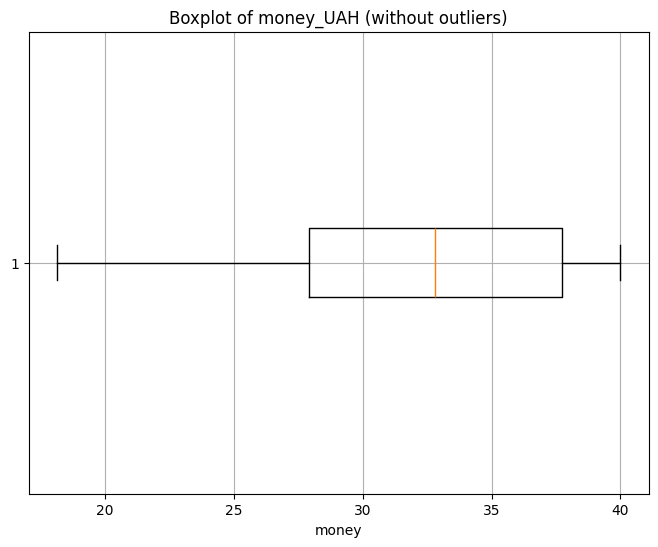

In [3567]:
# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(coff2['money'], vert=False)
plt.title('Boxplot of money_UAH (without outliers)')
plt.xlabel('money')
plt.grid(True)
plt.show()

จากการตรวจสอบการกระจายของข้อมูล พบว่ามีข้อมูลที่ผิดปกติอยู่หนึ่งค่าที่ไม่สามารถอธิบายได้ว่าเกิดจากอะไร เราได้ทำการเช็ควันที่ขายกาแฟวันนั้นแล้วก็มีค่ากาแฟชนิดนี้ซึ่งไม่เกิน30สิบ แล้วก็ดูค่าเฉลี่ยของกาแฟชนิดก็ไม่เกิน 30 เช่นกัน จากนั้นเราก็ได้ตรวจสอบการใข้บัตรของลูกค้าคนนี้ก็พบว่าการที่ลูกค่ามาซื้อของวันอื่นก็ไม่ได้มีค่าที่ผิดปกติอะไร เราจึงทำการดรอปข้อมูลนี้ทิ้งไป

In [3568]:
ans2 = coff[(coff['money_THB'] <= lower_bound) | (coff['money_THB'] >= upper_bound)]
print(ans2)

Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name, month, day, hour, money_THB, time_period, day_of_week, temperature]
Index: []


ข้อมูลของกาแฟที่สูงที่สุด (สร้างกราฟให้หน่อย)

In [3569]:
result = coff2[coff2['money'] == coff['money'].max()]
graf = result.groupby(['coffee_name', 'month']).size().unstack()
result

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week,temperature
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte,03,02,10,31.6,Morning,Saturday,3.4
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte,03,03,10,31.6,Morning,Sunday,1.7
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte,03,07,10,31.6,Morning,Thursday,-1.3
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte,03,07,11,31.6,Morning,Thursday,-1.3
60,2024-03-09,2024-03-09 11:49:37.292,cash,NaN,40.0,Hot Chocolate,03,09,11,31.6,Morning,Saturday,1.9
76,2024-03-10,2024-03-10 10:06:02.960,cash,NaN,40.0,Latte,03,10,10,31.6,Morning,Sunday,2.6
81,2024-03-11,2024-03-11 10:18:46.724,cash,NaN,40.0,Latte,03,11,10,31.6,Morning,Monday,-0.2
82,2024-03-11,2024-03-11 11:24:15.022,cash,NaN,40.0,Cappuccino,03,11,11,31.6,Morning,Monday,-0.2
89,2024-03-12,2024-03-12 10:15:00.297,cash,NaN,40.0,Latte,03,12,10,31.6,Morning,Tuesday,-0.7
105,2024-03-14,2024-03-14 10:02:12.241,cash,NaN,40.0,Latte,03,14,10,31.6,Morning,Thursday,3.1


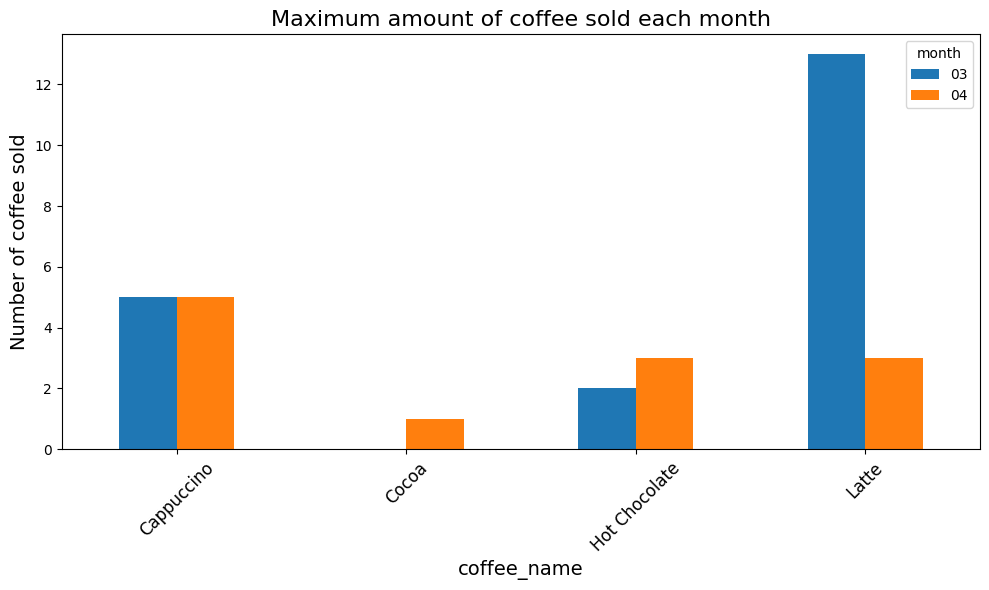

In [3570]:
# สร้างกราฟแท่ง
graf.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Maximum amount of coffee sold each month', fontsize=16)
plt.xlabel('coffee_name', fontsize=14)
plt.ylabel('Number of coffee sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='month')
plt.tight_layout()

# แสดงกราฟ
plt.show()

ข้อมูลของกาแฟที่น้อยที่สุด (สร้างกราฟให้หน่อย)

In [3571]:
result = coff2[coff2['money_THB'] == coff['money_THB'].min()]
result

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week,temperature
977,2024-07-18,2024-07-18 11:11:23.434,card,ANON-0000-0000-0381,18.12,Espresso,07,18,11,14.3148,Morning,Thursday,24.4
1024,2024-07-24,2024-07-24 09:54:37.456,card,ANON-0000-0000-0402,18.12,Espresso,07,24,09,14.3148,Morning,Wednesday,22.8
1027,2024-07-24,2024-07-24 14:45:49.766,card,ANON-0000-0000-0012,18.12,Espresso,07,24,14,14.3148,Afternoon,Wednesday,22.8
1041,2024-07-25,2024-07-25 21:06:50.002,card,ANON-0000-0000-0404,18.12,Espresso,07,25,21,14.3148,Evening,Thursday,21.6
1046,2024-07-26,2024-07-26 09:20:34.344,card,ANON-0000-0000-0059,18.12,Espresso,07,26,09,14.3148,Morning,Friday,23.6
1063,2024-07-27,2024-07-27 12:26:13.159,card,ANON-0000-0000-0040,18.12,Espresso,07,27,12,14.3148,Afternoon,Saturday,23.2
1065,2024-07-27,2024-07-27 14:28:41.904,card,ANON-0000-0000-0225,18.12,Espresso,07,27,14,14.3148,Afternoon,Saturday,23.2
1073,2024-07-28,2024-07-28 11:07:25.920,card,ANON-0000-0000-0012,18.12,Espresso,07,28,11,14.3148,Morning,Sunday,24.9
1095,2024-07-30,2024-07-30 11:13:16.218,card,ANON-0000-0000-0426,18.12,Espresso,07,30,11,14.3148,Morning,Tuesday,18.6
1104,2024-07-30,2024-07-30 20:24:19.874,card,ANON-0000-0000-0434,18.12,Espresso,07,30,20,14.3148,Evening,Tuesday,18.6


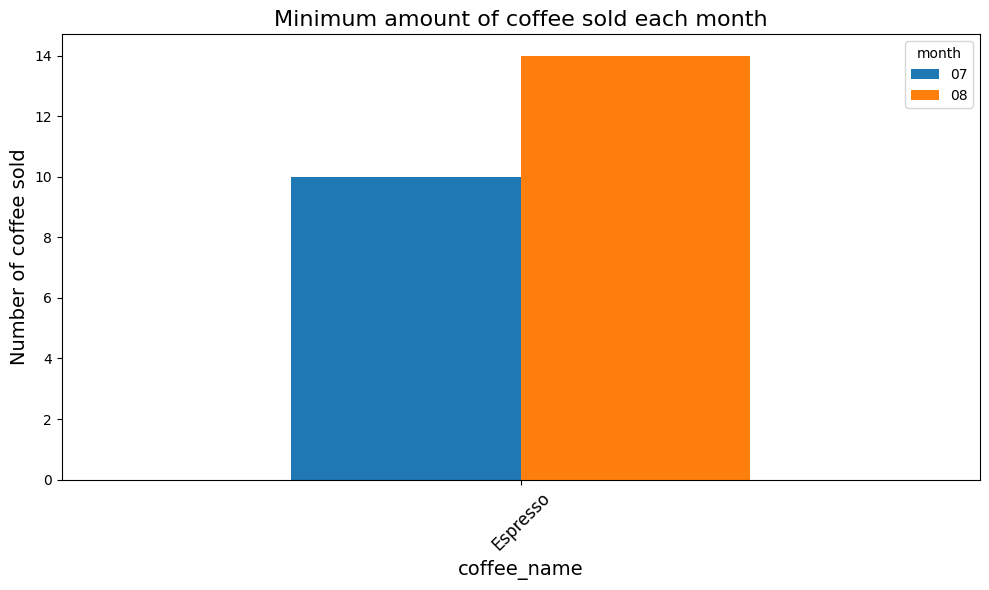

In [3572]:
# สร้างกราฟแท่ง
graf = result.groupby(['coffee_name', 'month']).size().unstack()
graf.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Minimum amount of coffee sold each month', fontsize=16)
plt.xlabel('coffee_name', fontsize=14)
plt.ylabel('Number of coffee sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='month')
plt.tight_layout()

# แสดงกราฟ
plt.show()

ราคาเฉลี่ยของกาแฟแต่ละชนิด max min

In [3573]:
coffee_mean = coff2.groupby(['coffee_name'])['money'].mean()
coffee_max = coff2.groupby(['coffee_name'])['money'].max()
coffee_min = coff2.groupby(['coffee_name'])['money'].min()
print("---------mean----------")
print(coffee_mean)
print("----------max----------")
print(coffee_max)
print("----------min----------")
print(coffee_min)

---------mean----------
coffee_name
Americano              26.560657
Americano with Milk    31.020776
Cappuccino             36.587448
Cocoa                  35.707059
Cortado                26.325674
Espresso               21.496825
Hot Chocolate          37.192500
Latte                  36.091772
Name: money, dtype: float64
----------max----------
coffee_name
Americano              30.0
Americano with Milk    35.0
Cappuccino             40.0
Cocoa                  40.0
Cortado                30.0
Espresso               25.0
Hot Chocolate          40.0
Latte                  40.0
Name: money, dtype: float64
----------min----------
coffee_name
Americano              23.02
Americano with Milk    27.92
Cappuccino             32.82
Cocoa                  32.82
Cortado                23.02
Espresso               18.12
Hot Chocolate          32.82
Latte                  32.82
Name: money, dtype: float64


จำนวนลูกค้าในแต่ละเดือน ตั้งแต่เดือน มีนาคม ถึง กันยายน  (สร้างกราฟให้หน่อย)

In [3574]:
ans = coff2['month'].value_counts().sort_index()
print(ans)

month
03    206
04    196
05    267
06    227
07    237
08    272
09     59
Name: count, dtype: int64


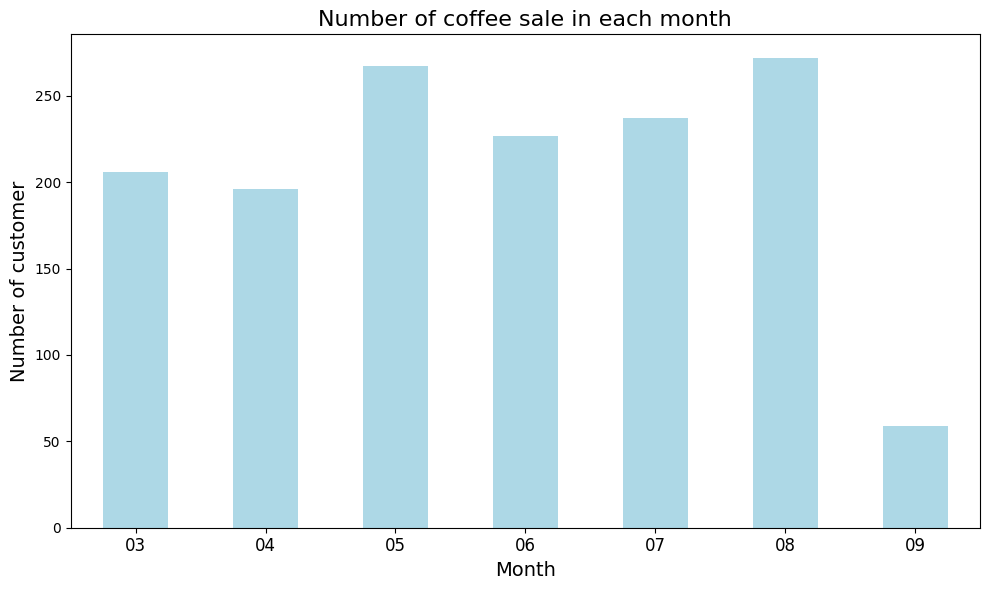

In [3575]:
# สร้างกราฟแท่ง
ans.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Number of coffee sale in each month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of customer', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

ยอดขายในแต่ละเดือนที่ขายกาแฟได้ ตั้งแต่เดือน มีนาคม ถึง กันยายน  (สร้างกราฟให้หน่อย)

In [3576]:
value = coff2.groupby(coff2['month'])['money'].sum().sort_index()
value


month
03    7050.20
04    6720.56
05    9063.42
06    7758.76
07    6915.94
08    7613.84
09    1745.28
Name: money, dtype: float64

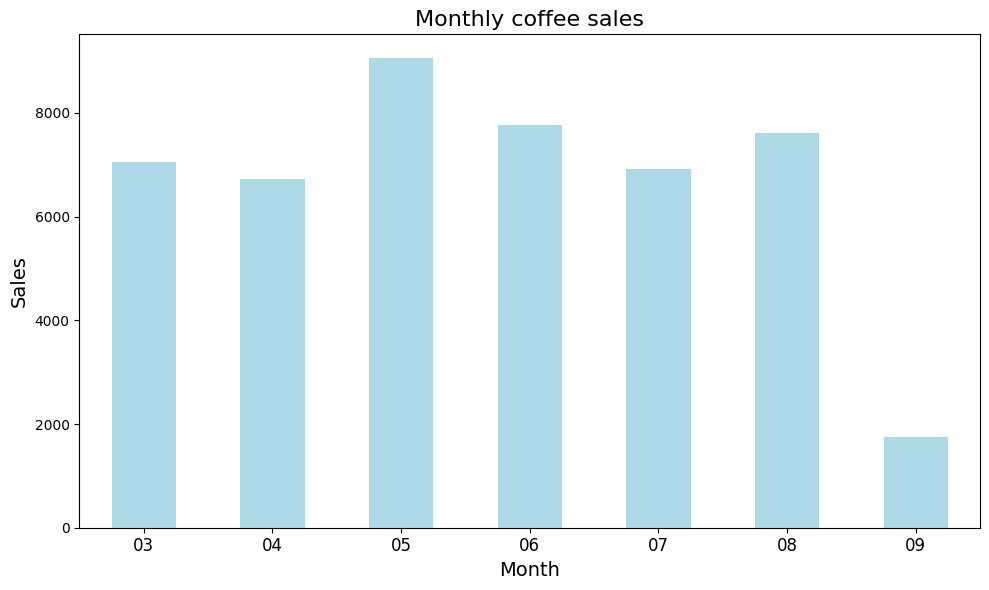

In [3577]:
# สร้างกราฟแท่ง
value.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Monthly coffee sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

จำนวนการขายกาแฟในแต่ละครั้ง และยอดขาย (สร้างกราฟให้หน่อย)

In [3578]:
value1 = coff2.groupby(['coffee_name']).size().sort_values()
value2 = coff2.groupby(['coffee_name'])['money'].sum().sort_values()
value3 = coff2.groupby(['coffee_name'])['money'].mean().sort_values()
print('จำนวนกาแฟที่ขายไป')
print(value1)
print('ยอดขายกาแฟ')
print(value2)
print('ราคาเฉลี่ยของกาแฟ')
print(value3)

จำนวนกาแฟที่ขายไป
coffee_name
Cocoa                   51
Espresso                63
Hot Chocolate           80
Cortado                141
Americano              213
Cappuccino             239
Latte                  316
Americano with Milk    361
dtype: int64
ยอดขายกาแฟ
coffee_name
Espresso                1354.30
Cocoa                   1821.06
Hot Chocolate           2975.40
Cortado                 3711.92
Americano               5657.42
Cappuccino              8744.40
Americano with Milk    11198.50
Latte                  11405.00
Name: money, dtype: float64
ราคาเฉลี่ยของกาแฟ
coffee_name
Espresso               21.496825
Cortado                26.325674
Americano              26.560657
Americano with Milk    31.020776
Cocoa                  35.707059
Latte                  36.091772
Cappuccino             36.587448
Hot Chocolate          37.192500
Name: money, dtype: float64


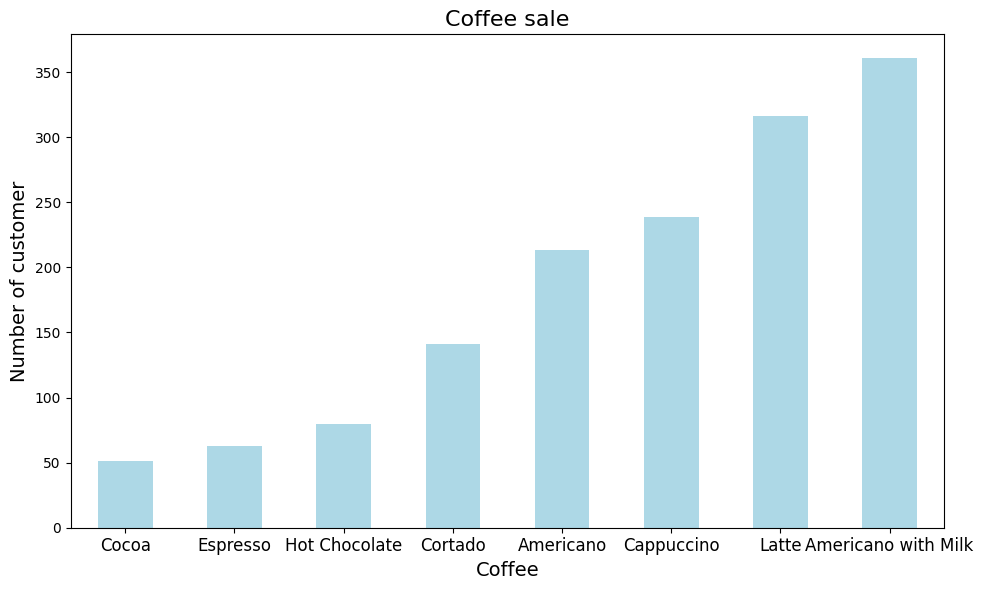

In [3579]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value1.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Coffee sale', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Number of customer', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

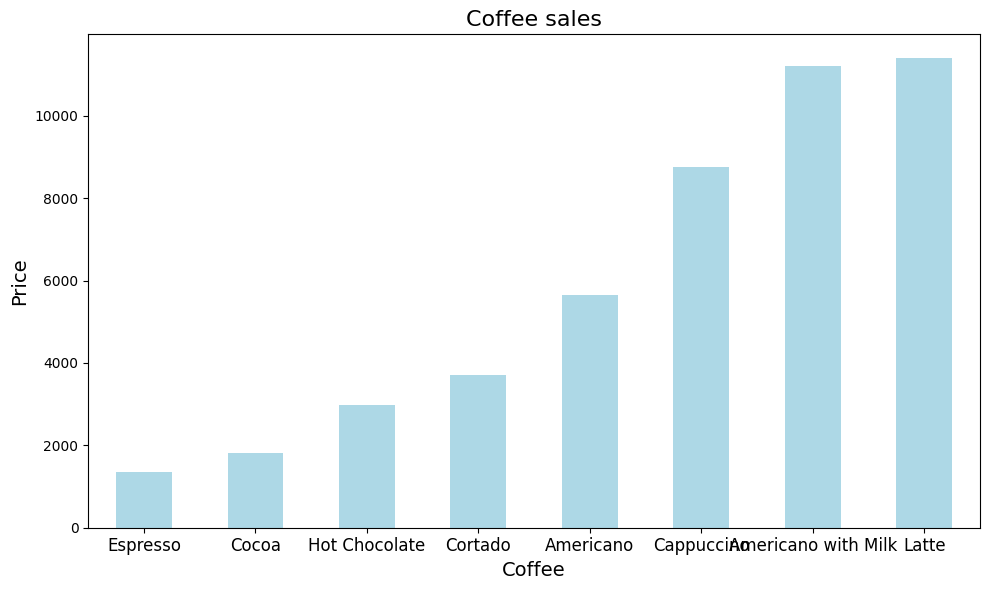

In [3580]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value2.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Coffee sales', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

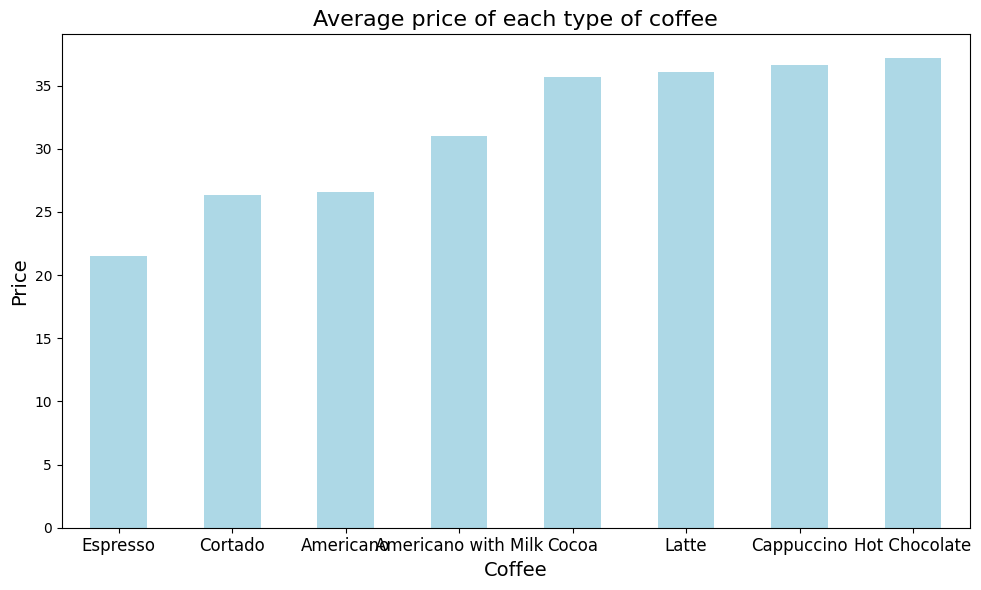

In [3581]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value3.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Average price of each type of coffee', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

ยอดขายกาแฟในแต่ละเดือน (สร้างกราฟให้หน่อย)

In [3582]:
value = coff2.groupby(['month','coffee_name'])['money'].sum().unstack()
value

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
month,,,,,,,,
03,1044.80,1154.00,780.50,232.20,869.20,241.00,854.00,1874.50
04,1001.94,1407.74,1659.44,232.82,548.48,171.00,506.02,1193.12
05,1348.80,1908.28,2078.44,340.76,474.64,185.14,529.36,2198.00
06,390.88,2268.12,1735.12,189.88,530.48,230.20,528.08,1886.00
07,858.12,1863.80,1079.64,300.28,322.28,273.28,361.02,1857.52
08,851.74,2010.24,1115.88,361.02,920.80,253.68,196.92,1903.56
09,161.14,586.32,295.38,164.10,46.04,NaN,NaN,492.30


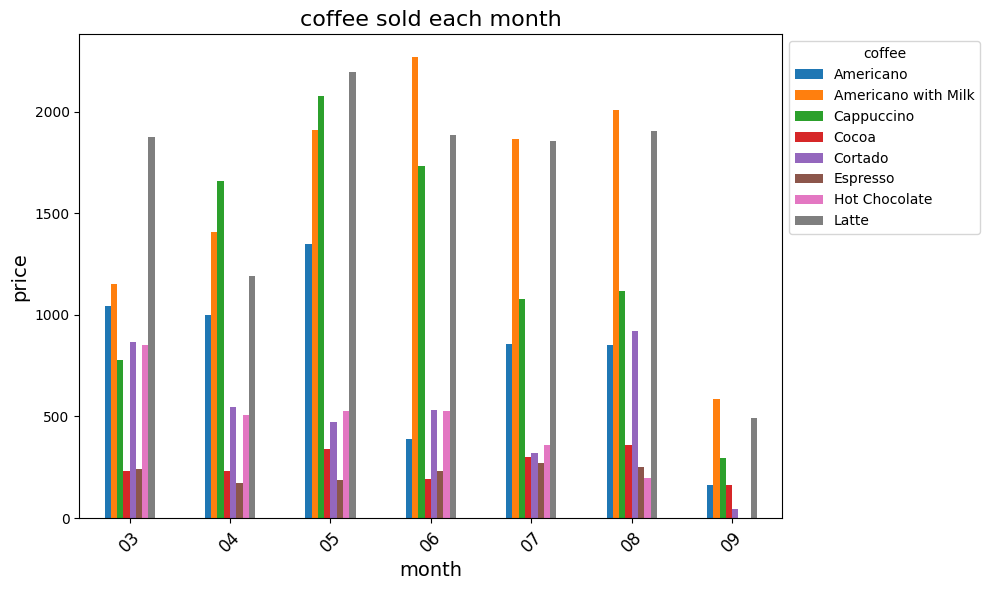

In [3583]:
value.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('coffee sold each month', fontsize=16)
plt.xlabel('month', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='coffee', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

ยอดขายกาแฟในแต่ละเดือน แล้วก็จำนวนแก้ว

In [3584]:
day_week_count = coff2.groupby(['day_of_week']).size()
day_week_count

/tmp/ipykernel_2274/2539387812.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_week_count = coff2.groupby(['day_of_week']).size()


day_of_week
Monday       200
Tuesday      237
Wednesday    209
Thursday     222
Friday       197
Saturday     201
Sunday       198
dtype: int64

In [3585]:
day_week_sale = coff2.groupby(['day_of_week']).size()
day_week_sale

/tmp/ipykernel_2274/584512699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_week_sale = coff2.groupby(['day_of_week']).size()


day_of_week
Monday       200
Tuesday      237
Wednesday    209
Thursday     222
Friday       197
Saturday     201
Sunday       198
dtype: int64

ยอดขายกาแฟแต่ละชนิดในแต่ละสัปดาห์

In [3586]:
day_week_coffee = coff2.groupby(['day_of_week','coffee_name'])['money'].sum().unstack()
day_week_coffee

/tmp/ipykernel_2274/1262902749.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_week_coffee = coff2.groupby(['day_of_week','coffee_name'])['money'].sum().unstack()


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
day_of_week,,,,,,,,
Monday,1175.10,1465.96,1329.46,239.54,380.22,115.14,212.60,1473.64
Tuesday,775.60,2073.62,1174.66,536.70,634.92,77.38,604.82,1749.92
Wednesday,832.78,1379.12,1215.68,250.32,607.00,334.56,306.00,1630.22
Thursday,861.70,1538.10,1406.04,32.82,522.14,253.70,514.66,1956.94
Friday,906.28,1322.00,864.60,296.20,528.02,217.46,542.28,1629.36
Saturday,517.94,1982.62,1293.38,328.32,527.52,155.74,273.82,1400.16
Sunday,588.02,1437.08,1460.58,137.16,512.10,200.32,521.22,1564.76


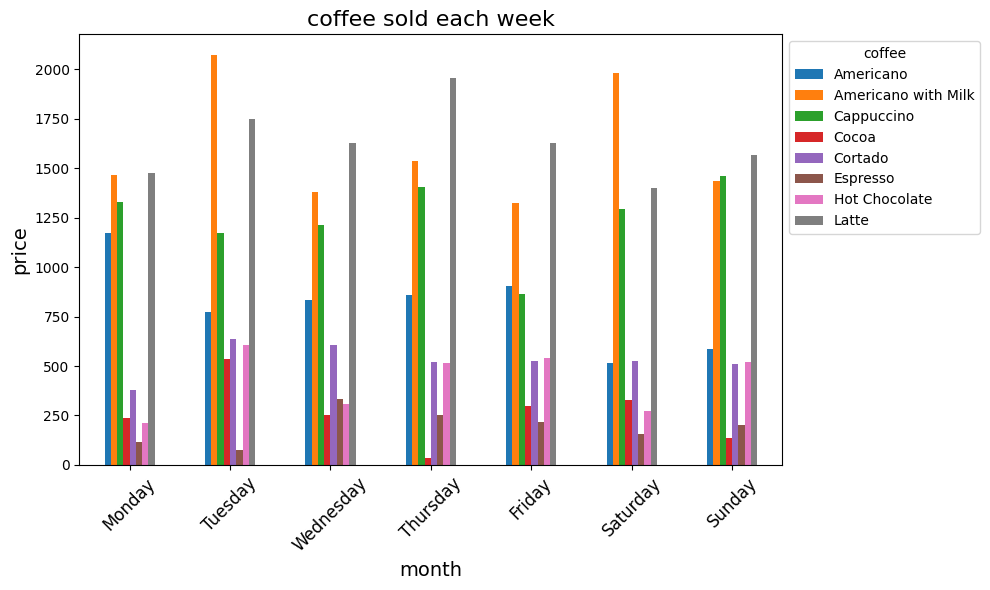

In [3587]:
day_week_coffee.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('coffee sold each week', fontsize=16)
plt.xlabel('month', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='coffee', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ

In [3588]:
value_type = coff2.groupby(coff2['month'])['cash_type'].value_counts().unstack(fill_value=0)
value_type

cash_type,card,cash
month,,
03,175,31
04,168,28
05,241,26
06,223,4
07,237,0
08,272,0
09,59,0


กราฟการจ่ายเงินในแต่ละเดือนว่าเป็นอย่างไร

<Figure size 1000x700 with 0 Axes>

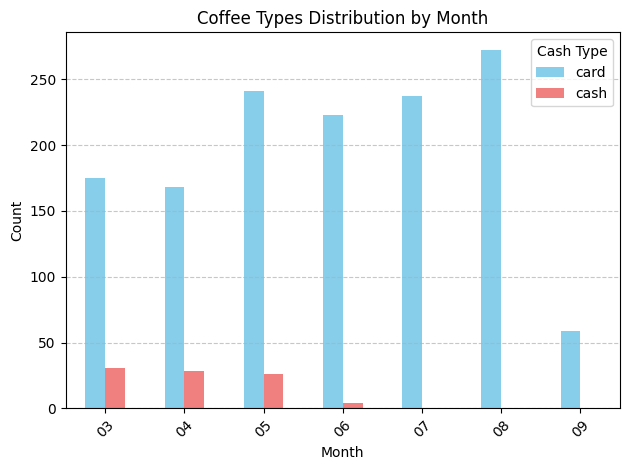

In [3589]:
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 7))
value_type.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])  # กำหนดสีที่แตกต่าง
plt.title('Coffee Types Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # หมุนป้ายแกน x เพื่อให้อ่านง่ายขึ้น
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # ปรับให้พอดีกับกราฟ
plt.legend(title='Cash Type')  # เพิ่มตำนานให้กับประเภท
plt.show()

การจ่ายเงินในกาแฟแต่ละชนิด  (สร้างตาราง)

In [3590]:
# สร้างตารางไขว้
crosstab_payment_drink = coff2.groupby(['coffee_name', 'cash_type']).size().unstack()
crosstab_payment_drink

cash_type,card,cash
coffee_name,,
Americano,199,14
Americano with Milk,346,15
Cappuccino,224,15
Cocoa,47,4
Cortado,136,5
Espresso,58,5
Hot Chocolate,74,6
Latte,291,25


<Figure size 1000x700 with 0 Axes>

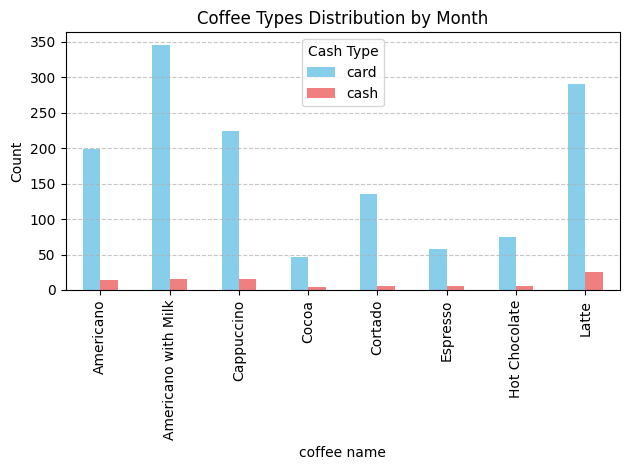

In [3591]:
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 7))
crosstab_payment_drink.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])  # กำหนดสีที่แตกต่าง
plt.title('Coffee Types Distribution by Month')
plt.xlabel('coffee name')
plt.ylabel('Count')
plt.xticks(rotation=90)  # หมุนป้ายแกน x เพื่อให้อ่านง่ายขึ้น
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # ปรับให้พอดีกับกราฟ
plt.legend(title='Cash Type')  # เพิ่มตำนานให้กับประเภท
plt.show()

การจ่ายเงินในกาแฟแต่ละจะจ่ายอยู่ที่เท่าไหร่

In [3592]:
coffee_type = coff2.groupby(['coffee_name','cash_type'])['money'].mean().unstack()
coffee_type

cash_type,card,cash
coffee_name,,
Americano,26.358894,29.428571
Americano with Milk,30.868497,34.533333
Cappuccino,36.381250,39.666667
Cocoa,35.405532,39.250000
Cortado,26.190588,30.000000
Espresso,21.212069,24.800000
Hot Chocolate,36.978378,39.833333
Latte,35.786942,39.640000


<Figure size 1000x700 with 0 Axes>

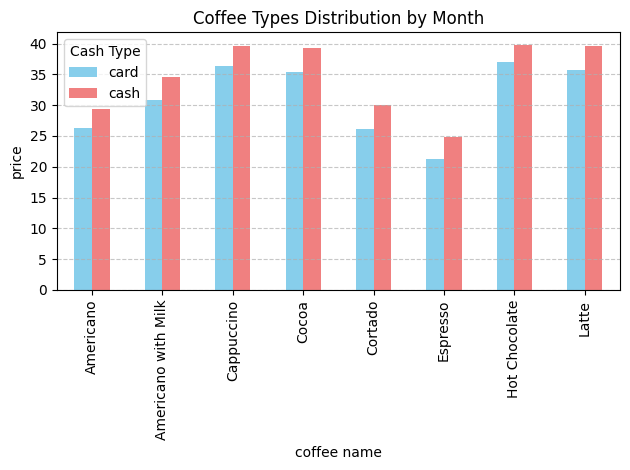

In [3593]:
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 7))
coffee_type.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])  # กำหนดสีที่แตกต่าง
plt.title('Coffee Types Distribution by Month')
plt.xlabel('coffee name')
plt.ylabel('price')
plt.xticks(rotation=90)  # หมุนป้ายแกน x เพื่อให้อ่านง่ายขึ้น
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # ปรับให้พอดีกับกราฟ
plt.legend(title='Cash Type')  # เพิ่มตำนานให้กับประเภท
plt.show()

ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
เช้า (Morning): 07:00 - 12:00
บ่าย (Afternoon): 12:00 - 18:00
เย็น (Evening): 18:00 - 22:00
(สร้างกราฟให้หน่อย)

In [3594]:
value = coff2.groupby('time_period').size()

print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : {value['Morning']}")
print(f"จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : {value['Afternoon']}")
print(f"จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : {value['Evening']}")

จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : 486
จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : 565
จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : 413


In [3595]:
value = coff2.groupby('time_period')['money'].sum()

print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : {value['Morning']} บาท")
print(f"จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : {value['Afternoon']} บาท")
print(f"จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : {value['Evening']} บาท")

จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : 14980.34 บาท
จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : 18146.02 บาท
จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : 13741.64 บาท


ส่วนใหญ่ลูกค้าที่มาซื้อซ้ำจะกินกาแฟอะไร (ทำกราฟ)

In [3596]:
coffee_repeat = coff2.groupby(['coffee_name','time_period']).size()
coffee_repeat

coffee_name          time_period
Americano            Afternoon       98
                     Evening         32
                     Morning         83
Americano with Milk  Afternoon      136
                     Evening         99
                     Morning        126
Cappuccino           Afternoon       93
                     Evening         92
                     Morning         54
Cocoa                Afternoon       18
                     Evening         21
                     Morning         12
Cortado              Afternoon       52
                     Evening         24
                     Morning         65
Espresso             Afternoon       33
                     Evening         12
                     Morning         18
Hot Chocolate        Afternoon       26
                     Evening         35
                     Morning         19
Latte                Afternoon      109
                     Evening         98
                     Morning        109
dtype: 

จำนวนคนที่มาซื้อซ้ำ

In [3597]:
repeat_customers = coff2.groupby('card').filter(lambda x: len(x) > 1)
notrepeat_customers = coff2.groupby('card').filter(lambda x: len(x) == 1)
repeat_customers

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week,temperature
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,03,01,10,30.5730,Morning,Friday,4.7
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon,Friday,4.7
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon,Friday,4.7
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,03,01,13,22.8310,Afternoon,Friday,4.7
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,03,01,13,30.5730,Afternoon,Friday,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,2024-09-05,2024-09-05 17:05:31.684,card,ANON-0000-0000-0586,32.82,Cappuccino,09,05,17,25.9278,Afternoon,Thursday,22.9
1460,2024-09-05,2024-09-05 20:54:24.429,card,ANON-0000-0000-0588,23.02,Americano,09,05,20,18.1858,Evening,Thursday,22.9
1461,2024-09-05,2024-09-05 20:55:31.429,card,ANON-0000-0000-0588,32.82,Cappuccino,09,05,20,25.9278,Evening,Thursday,22.9
1462,2024-09-05,2024-09-05 21:26:28.836,card,ANON-0000-0000-0040,27.92,Americano with Milk,09,05,21,22.0568,Evening,Thursday,22.9


In [3598]:
coffee_repeat = repeat_customers.groupby('coffee_name').size().sort_values()
coffee_repeat

coffee_name
Espresso                35
Cocoa                   38
Hot Chocolate           52
Cortado                111
Cappuccino             152
Americano              154
Latte                  210
Americano with Milk    257
dtype: int64

ลูกค้าที่ไม่ซื้อซ้ำซื้ออะไรไปกิน

In [3599]:
coffee_notrepeat = notrepeat_customers.groupby('coffee_name').size().sort_values()
coffee_notrepeat

coffee_name
Cocoa                   9
Hot Chocolate          22
Espresso               23
Cortado                25
Americano              45
Cappuccino             72
Latte                  81
Americano with Milk    89
dtype: int64

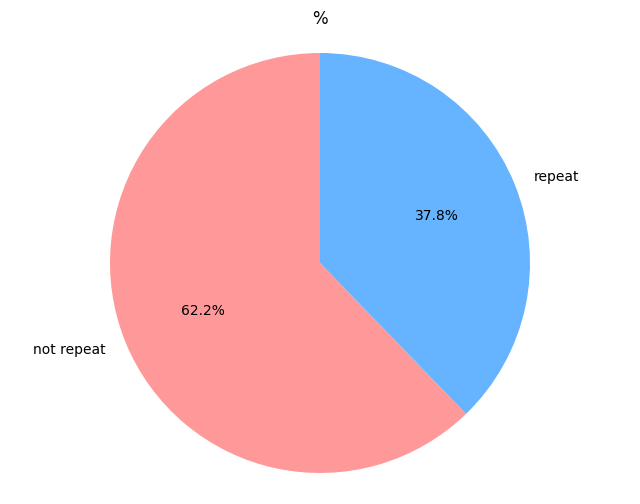

In [3600]:
mabel = coff2.groupby(['card'])[['datetime']].nunique().sort_values("datetime", ascending=False)
Notrepeat = mabel[mabel['datetime']==1]
repeat =  mabel[mabel['datetime']>1]

# นับจำนวนของ Notrepeat และ repeat
notrepeat_count = len(Notrepeat)
repeat_count = len(repeat)


# สร้าง DataFrame สำหรับ Pie Chart
data_counts = {
    'type': ['not repeat', 'repeat'],
    'count': [notrepeat_count, repeat_count]
}

# แปลงเป็น DataFrame
data_df = pd.DataFrame(data_counts)

# สร้าง Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(data_df['count'], labels=data_df['type'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('%')
plt.axis('equal')  # ทำให้วงกลมเป็นวงกลมจริง
plt.show()

หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน
Americano with Milk: มีน้ำร้อนมากกว่าเน้นรสกาแฟเข้มข้น
Latte: มีนมมากกว่าทำให้รสชาติของกาแฟนุ่มนวลและครีมมี่
Espresso เป็นพื้นฐานของเครื่องดื่มหลายชนิด
Cortado และ Cappuccino มีนมเป็นส่วนสำคัญ แต่มีปริมาณที่แตกต่างกัน
Americano จะมีน้ำร้อนเป็นหลัก ส่วน Latte จะมีนมมากกว่าจึงมีความนุ่มนวลกว่า
Cocoa และ Hot Chocolate เป็นเครื่องดื่มช็อกโกแลตที่ไม่มีกาแฟ

In [3601]:
# รวมกลุ่มตามเดือนและชื่อกาแฟและหายอดขายรวม
value = coff2.groupby(['month', 'coffee_name'])['money_THB'].sum().reset_index()

# หาสินค้าขายดีในแต่ละเดือน
best_selling_per_month = value.loc[value.groupby('month')['money_THB'].idxmax()]

# แสดงผลลัพธ์
print(best_selling_per_month)


   month          coffee_name  money_THB
7     03                Latte  1480.8550
10    04           Cappuccino  1310.9576
23    05                Latte  1736.4200
25    06  Americano with Milk  1791.8148
33    07  Americano with Milk  1472.4020
41    08  Americano with Milk  1588.0896
49    09  Americano with Milk   463.1928


การทำการทดสอบสถิติเพื่อดูว่ายอดขายในช่วงเวลาต่าง หากคุณต้องการเปรียบเทียบยอดขายระหว่างสามช่วงเวลา (เช้า บ่าย เย็น) คุณสามารถใช้ การทดสอบ ANOVA (Analysis of Variance) ได้ ทดสอบว่า ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลามีความแตกต่างกันไหม

In [3602]:
import pandas as pd

# สร้าง pivot_table
group = coff2.groupby(['time_period', 'coffee_name'])['money'].sum()
df = group.reset_index()
df.columns = ['Time_Period', 'Coffee_Name', 'Total_Sales']

pivot_table = df.pivot(index='Time_Period', columns='Coffee_Name', values='Total_Sales').fillna(0)

# เพิ่มคอลัมน์ 'total' ที่คำนวณผลรวมของแต่ละแถว (time_period)
pivot_table['total'] = pivot_table.sum(axis=1)

# คำนวณผลรวมของแต่ละคอลัมน์ (excluding Time_Period)
total_sales = pivot_table[['Americano', 'Americano with Milk', 'Cappuccino', 'Cocoa', 'Cortado',
                           'Espresso', 'Hot Chocolate', 'Latte']].sum()

# สร้างแถว Total
total_row = pd.Series({'Americano': total_sales['Americano'], 
                       'Americano with Milk': total_sales['Americano with Milk'], 
                       'Cappuccino': total_sales['Cappuccino'], 
                       'Cocoa': total_sales['Cocoa'], 
                       'Cortado': total_sales['Cortado'], 
                       'Espresso': total_sales['Espresso'], 
                       'Hot Chocolate': total_sales['Hot Chocolate'], 
                       'Latte': total_sales['Latte'], 
                       'total': total_sales.sum()  # ผลรวมของทั้งหมด
                      }, name='Total')

# ใช้ pd.concat() เพื่อเพิ่มแถว Total
pivot_table = pd.concat([pivot_table, total_row.to_frame().T])

# แสดงผล pivot_table ที่มีแถว Total เพิ่มเข้ามา
pivot_table


,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,total
Afternoon,2680.06,4276.64,3437.96,662.92,1439.46,731.28,996.38,3921.32,18146.02
Evening,828.88,3123.56,3374.14,737.54,630.88,263.52,1294.36,3488.76,13741.64
Morning,2148.48,3798.30,1932.30,420.60,1641.58,359.50,684.66,3994.92,14980.34
Total,5657.42,11198.50,8744.40,1821.06,3711.92,1354.30,2975.40,11405.00,46868.00


1.กำหนดสมติฐาน
    H0 : ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลาไม่แตกต่างกัน
    H1 : ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลามีความแตกต่างกันอย่างน้อย 1 คู่
2.ระดับนัยสำคัญ 0.05
3.สถิติทดสอบ Fcal = 34.37400131
4.การตัดสินใจ 
    ค่าวิกฤติ: Fที่ 0.95,(7,24) 

In [3603]:
import scipy.stats as stats
sum_every = pivot_table['total']['Total']
sum_exponent = ((2680.06**2) + (828.88**2) + (2148.48**2) + 
                (4276.64**2) + (3123.56**2) + (3798.30**2)+
                (3437.96**2) + (3374.14**2) + (1932.30**2)+
                (662.92**2) + (737.54**2) + (420.60**2) +
                (1439.46**2) + (630.88**2) + (1641.58**2) +
                (731.28**2) + (263.52**2) + (359.50**2) +
                (996.38**2) + (1294.36**2) + (684.66**2) +
                (3921.32**2) + (3488.76**2) + (3994.92**2)
                )
K = 8
L = 3
N = K*L
SSt = sum_exponent - ((sum_every**2)/N)
SStrt = [((pivot_table['Americano']['Total']**2)/L) + ((pivot_table['Americano with Milk']['Total']**2)/L) + ((pivot_table['Cappuccino']['Total']**2)/L)+
         ((pivot_table['Cocoa']['Total']**2)/L) + ((pivot_table['Cortado']['Total']**2)/L) + ((pivot_table['Espresso']['Total']**2)/L) + 
         ((pivot_table['Hot Chocolate']['Total']**2)/L) + ((pivot_table['Latte']['Total']**2)/L)] - ((sum_every**2)/N)
SSb = [((pivot_table['total']['Afternoon']**2)/K) + ((pivot_table['total']['Evening']**2)/K) + ((pivot_table['total']['Morning']**2)/K)] - ((sum_every**2)/N)
SSe = SSt - SStrt - SSb
#หาdf
df_coffee = K-1
df_time = L-1
df_error = N-1

#sumsquare
sum_sstrt = SStrt
sum_ssb = SSb
sum_sse = SSe
sum_total = SSt

#mean square
MStrt = sum_sstrt/df_coffee
MSb = sum_ssb/df_time
MSe = sum_sse/df_error

#F radio
Fcal = MStrt/MSe
F2 = MSb/MSe

# กำหนดค่า
alpha = 0.05  # ระดับความเชื่อมั่น 1 - 0.95
dof1 = K-1  # degree of freedom สำหรับ m
dof2 = (K-1)*(L-1)  # degree of freedom สำหรับ n

# คำนวณค่า F
f_value = stats.f.ppf(1 - alpha, dof1, dof2)

if Fcal > f_value:
    print("ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลามีความแตกต่างกันอย่างน้อย 1 คู่ ")
else:
    print("ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลาไม่แตกต่างกัน")

    

ยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลามีความแตกต่างกันอย่างน้อย 1 คู่ 


หา LSD การเปรียบเทียบพหุคูณในแบบแผนการการทดลอง เปรียบเทียบค่าเฉลี่ยรายคู่

2.ระดับนัยสำคัญ 0.05
3.สถิติทดสอบ LSD = 
4.การตัดสินใจ 
    ค่าวิกฤติ: Fที่ 0.95,(7,24)

In [3604]:
import numpy as np
import math
import scipy.stats as stats

alpha = 0.05  # ระดับความเชื่อมั่น (1 - 0.95)
t_value = stats.t.ppf(1 - alpha/2, (K-1)*(L-1))
LSD = t_value * np.sqrt(MSe*(2/L))

mean_Americano = pivot_table['Americano']['Total']/L
mean_Americano_with_Milk = pivot_table['Americano with Milk']['Total']/L
mean_Cappuccino = pivot_table['Cappuccino']['Total']/L
mean_Cocoa = pivot_table['Cocoa']['Total']/L
mean_Cortado = pivot_table['Cortado']['Total']/L
mean_Espresso = pivot_table['Espresso']['Total']/L
mean_Hot_Chocolate = pivot_table['Hot Chocolate']['Total']/L
mean_Latte = pivot_table['Latte']['Total']/L


Couple = math.factorial(K)/(math.factorial(K-2)*math.factorial(2))
#28คู่ที่ต้องเปรียบเทียบ

if (abs(mean_Americano - mean_Americano_with_Milk) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Americano_with_Milk แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Americano_with_Milk ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")
    
if (abs(mean_Americano - mean_Cappuccino) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cappuccino แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cappuccino ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")
    
if (abs(mean_Americano - mean_Cocoa) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cocoa แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cocoa ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")
    
if (abs(mean_Americano - mean_Cortado) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cortado แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cortado ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")
    
if (abs(mean_Americano - mean_Espresso) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Espresso ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")
    
if (abs(mean_Americano - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Hot Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")
 
if (abs(mean_Americano - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")   

if (abs(mean_Americano_with_Milk - mean_Cappuccino) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cappuccino แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cappuccino ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")  
    
if (abs(mean_Americano_with_Milk - mean_Cocoa) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cocoa แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cocoa ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")  
    
if (abs(mean_Americano_with_Milk - mean_Cortado) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cortado แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cortado ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 
    
if (abs(mean_Americano_with_Milk - mean_Espresso) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Espresso ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 
    
if (abs(mean_Americano_with_Milk - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Hot Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 
    
if (abs(mean_Americano_with_Milk - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 
    
if (abs(mean_Cappuccino - mean_Cocoa) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Cocoa แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Cocoa ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 
    
if (abs(mean_Cappuccino - mean_Cortado) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Cortado แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Cortado ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 

if (abs(mean_Cappuccino - mean_Espresso) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Espresso ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 
    
if (abs(mean_Cappuccino - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Hot_Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Hot_Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 
    
if (abs(mean_Cappuccino - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cappuccino และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 
    
if (abs(mean_Cocoa - mean_Cortado) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Cortado แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Cortado ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 

if (abs(mean_Cocoa - mean_Espresso) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Espresso ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 

if (abs(mean_Cocoa - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Hot Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 
    
if (abs(mean_Cocoa - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cocoa และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05") 
    
if (abs(mean_Cortado - mean_Espresso) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Espresso ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")
    
if (abs(mean_Cortado - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Hot Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Cortado - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Cortado และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Espresso - mean_Hot_Chocolate) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Espresso และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Espresso และ ยอดขายกาแฟ Hot Chocolate ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")

if (abs(mean_Espresso - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Espresso และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟ Espresso และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")   

if (abs(mean_Hot_Chocolate - mean_Latte) >= LSD) : #ปฏิเสธH0
    print("ยอดขายกาแฟ Hot Chocolate และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05")
else :
    print("ยอดขายกาแฟHot Chocolate และ ยอดขายกาแฟ Latte ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05")   


ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Americano_with_Milk แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cappuccino แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cocoa แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Cortado ไม่แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano และ ยอดขายกาแฟ Latte แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cappuccino แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cocoa แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Cortado แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Espresso แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแฟ Americano_with_Milk และ ยอดขายกาแฟ Hot Chocolate แตกต่างกันที่ระดับนัยสำคัญ 0.05
ยอดขายกาแ

การทดสอบเพื่อดูว่ามีความแตกต่างของยอดขายกาแฟในแต่ละชนิดหรือไม่ โดยใช้การทดสอบ LSD (Least Significant Difference) หลังจากการทดสอบ ANOVA วิเคราะห์ความนิยมของกาแฟ

In [3605]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
# 4. การทดสอบ LSD
model = ols('money_THB ~ coffee_name', data=coff2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq      df          F  PR(>F)
coffee_name  19544.204479     7.0  648.49982     0.0
Residual      6268.613196  1456.0        NaN     NaN


F-statistic: ค่าของ F-statistic ที่สูง (648.49982 บาท) หมายความว่า มีความแตกต่างระหว่างกลุ่มข้อมูล (ในที่นี้คือชนิดของกาแฟ) อย่างมีนัยสำคัญ

p-value: p-value ที่ได้คือ 0.00 ซึ่งต่ำกว่าระดับนัยสำคัญทั่วไป (0.05 หรือ 0.01)
นี้แสดงว่ามีหลักฐานเพียงพอที่จะปฏิเสธสมมติฐานว่าว่าไม่มีความแตกต่างระหว่างยอดขายกาแฟชนิดต่าง ๆ แสดงว่าข้อมูลมีความแตกต่าง


In [3606]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# การทดสอบ LSD
tukey_results = pairwise_tukeyhsd(endog=coff2['money_THB'], groups=coff2['coffee_name'], alpha=0.05)
print(tukey_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
          Americano Americano with Milk   3.5235    0.0   2.9793   4.0676   True
          Americano          Cappuccino   7.9212    0.0   7.3277   8.5146   True
          Americano               Cocoa   7.2257    0.0   6.2438   8.2075   True
          Americano             Cortado  -0.1856 0.9918  -0.8694   0.4981  False
          Americano            Espresso  -4.0004    0.0  -4.9037  -3.0972   True
          Americano       Hot Chocolate   8.3992    0.0   7.5733    9.225   True
          Americano               Latte   7.5296    0.0   6.9712   8.0879   True
Americano with Milk          Cappuccino   4.3977    0.0   3.8725   4.9229   True
Americano with Milk               Cocoa   3.7022    0.0     2.76   4.6443   True
Americano with Milk         